# Testar lite analys

In [1]:
import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt

with open("results_april_25.csv") as f:
  csv_string = f.read()

# Split the two tables
table1_str = csv_string[:csv_string.find("imageA")]
table2_str = csv_string[csv_string.find("imageA"):]

table1 = pd.read_table(StringIO(table1_str), sep=",")
table2 = pd.read_table(StringIO(table2_str), sep=",")

# Strip folder number in file names
table1 = table1.rename(lambda s: s.split("\\")[-1], axis="columns")
for col_name in ['imageA', 'imageB', 'chosenImage']:
    table2[col_name] = table2[col_name].map(lambda s: s.split("\\")[-1])
    
image_sets = list(set(name.split("_")[0] for name in table1.columns[6:]))
image_sets

['bus', 'smolking', 'mushroom', 'interpsmolking', 'bird', 'snail']

In [2]:
# run to interact with figures
#%matplotlib notebook

In [3]:
table1.iloc[:, 2:]

,time,age,gender,imageExperience,snail_lab.png,snail_linrgb.png,snail_srgb.png,bird_bilinear.png,bird_lanczos3.png,bird_ogniewski.png,...,interpsmolking_bilinear.png,interpsmolking_lanczos3.png,interpsmolking_ogniewski.png,mushroom_bicubic.png,mushroom_bilinear.png,mushroom_lanczos3.png,mushroom_ogniewski.png,smolking_lab.png,smolking_linrgb.png,smolking_srgb.png
0,372.991,23,male,education,1,0,2,2,3,0,...,0,1,2,2,1,0,3,2,0,1
1,198.954,32,female,education,1,0,2,0,3,1,...,2,0,3,3,1,0,2,2,0,1
2,296.971,21,male,none,0,1,2,1,3,0,...,0,2,3,2,1,0,3,0,2,1
3,79.244,34,male,none,0,1,2,0,2,1,...,2,0,3,2,1,0,3,1,0,2
4,207.795,50,male,professional,1,0,2,1,3,0,...,2,0,3,2,1,0,3,2,0,1
5,428.908,25,male,education,1,0,2,1,2,0,...,1,0,2,2,0,1,3,2,0,1
6,135.561,51,male,professional,0,1,2,2,1,0,...,0,1,2,1,0,3,2,0,1,2
7,132.467,23,male,education,0,1,2,1,2,0,...,2,0,3,3,1,0,2,1,0,2
8,140.001,25,female,none,0,1,2,1,2,0,...,2,0,3,2,1,0,3,1,0,2
9,179.692,22,male,education,0,1,2,1,3,0,...,1,0,2,1,2,0,3,0,1,2


In [4]:
table2

,imageA,imageB,chosenImage,time,participantId,isRepeat
0,snail_lab.png,snail_srgb.png,snail_srgb.png,43.769,91bac3f4-f20d-4cf3-94c7-e5777980b16b,0
1,snail_srgb.png,snail_linrgb.png,snail_srgb.png,7.696,91bac3f4-f20d-4cf3-94c7-e5777980b16b,0
2,snail_linrgb.png,snail_srgb.png,snail_linrgb.png,3.331,91bac3f4-f20d-4cf3-94c7-e5777980b16b,1
3,snail_lab.png,snail_linrgb.png,snail_lab.png,4.727,91bac3f4-f20d-4cf3-94c7-e5777980b16b,0
4,bird_ogniewski.png,bird_bicubic.png,bird_bicubic.png,11.466,91bac3f4-f20d-4cf3-94c7-e5777980b16b,0
...,...,...,...,...,...,...
1048,mushroom_ogniewski.png,mushroom_bicubic.png,mushroom_ogniewski.png,4.340,0421c4c9-b9a9-4c2f-83af-adcb5275c4e2,0
1049,smolking_linrgb.png,smolking_lab.png,smolking_lab.png,10.368,0421c4c9-b9a9-4c2f-83af-adcb5275c4e2,0
1050,smolking_srgb.png,smolking_lab.png,smolking_lab.png,5.191,0421c4c9-b9a9-4c2f-83af-adcb5275c4e2,0
1051,smolking_lab.png,smolking_srgb.png,smolking_lab.png,4.050,0421c4c9-b9a9-4c2f-83af-adcb5275c4e2,1


## Filter data [TODO]

In [5]:
table1 = table1.query("age != 1")

#table1 = table1.query("age > 25")

# TODO Filter in table2 as well
#table1

<AxesSubplot:>

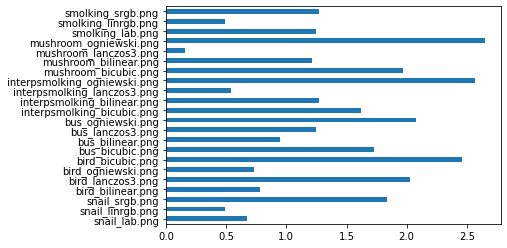

In [6]:
table1.iloc[:, 6:].mean().plot.barh()

## Rankings for each image set

<Figure size 432x288 with 0 Axes>

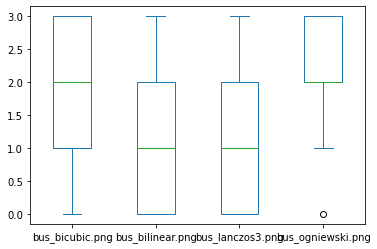

<Figure size 432x288 with 0 Axes>

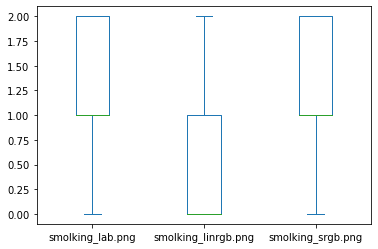

<Figure size 432x288 with 0 Axes>

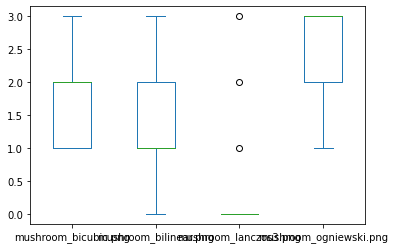

<Figure size 432x288 with 0 Axes>

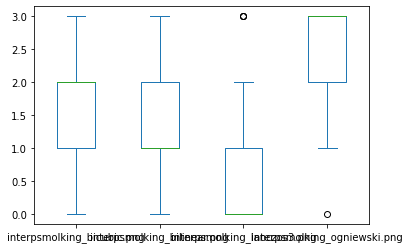

<Figure size 432x288 with 0 Axes>

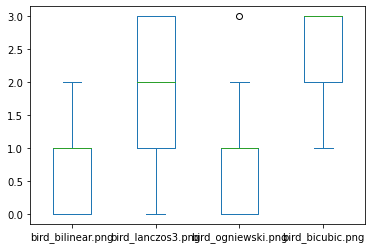

<Figure size 432x288 with 0 Axes>

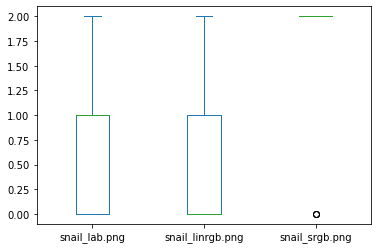

In [12]:
for selected_set in image_sets:
    plt.figure()
    matching_cols = [col for col in table1 if col.startswith(selected_set)]
    #table1[matching_cols].mean().plot.barh()
    table1[matching_cols].plot.box() # Probably useful when we have some participants
    
    #table1[matching_cols].transpose().plot.barh()
    
    
    

## Idk

<AxesSubplot:>

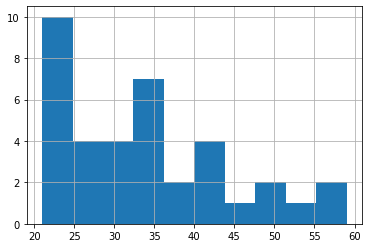

In [8]:
table1['age'].hist()

<AxesSubplot:>

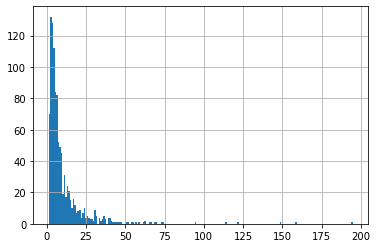

In [11]:
table2['time'].hist(bins=200)